In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading the Data

In [2]:
import pandas as pd
# Load datasets
df = pd.read_csv('/content/drive/My Drive/GlobalLandTemperaturesByCity.csv')
print(df.head())

           dt  AverageTemperature  AverageTemperatureUncertainty   City  \
0  1743-11-01               6.068                          1.737  Århus   
1  1743-12-01                 NaN                            NaN  Århus   
2  1744-01-01                 NaN                            NaN  Århus   
3  1744-02-01                 NaN                            NaN  Århus   
4  1744-03-01                 NaN                            NaN  Århus   

   Country Latitude Longitude  
0  Denmark   57.05N    10.33E  
1  Denmark   57.05N    10.33E  
2  Denmark   57.05N    10.33E  
3  Denmark   57.05N    10.33E  
4  Denmark   57.05N    10.33E  


In [3]:
df.City.shape

(8599212,)

In [4]:
# df.City.unique()
unique_cities_count = df['City'].nunique()
print(unique_cities_count)


3448


In [5]:
unique_cities_count = df['Country'].nunique()
print(unique_cities_count)

159


# Initial Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [7]:
# Convert date columns to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Inspect for missing values
print(df.isnull().sum())

# Fill or drop missing values (example: fill forward)
df.fillna(method='ffill', inplace=True)

dt                                    0
AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
dtype: int64


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [9]:
df.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [10]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
2,1744-01-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
3,1744-02-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
4,1744-03-01,6.068,1.737,Århus,Denmark,57.05N,10.33E


# Check Normality

In [12]:
from scipy import stats

In [13]:
print(stats.skew(df.AverageTemperature))# value Between -1 and +1
print(stats.kurtosis(df.AverageTemperature))# value Between -1 and +1

-0.903115783105009
0.49537411357168226


In [14]:
print(stats.skew(df.AverageTemperatureUncertainty))# value Between -1 and +1
print(stats.kurtosis(df.AverageTemperatureUncertainty))# value Between -1 and +1

2.9264632270599322
13.625454602680893


# Trend Analysis for Århus, Denmark

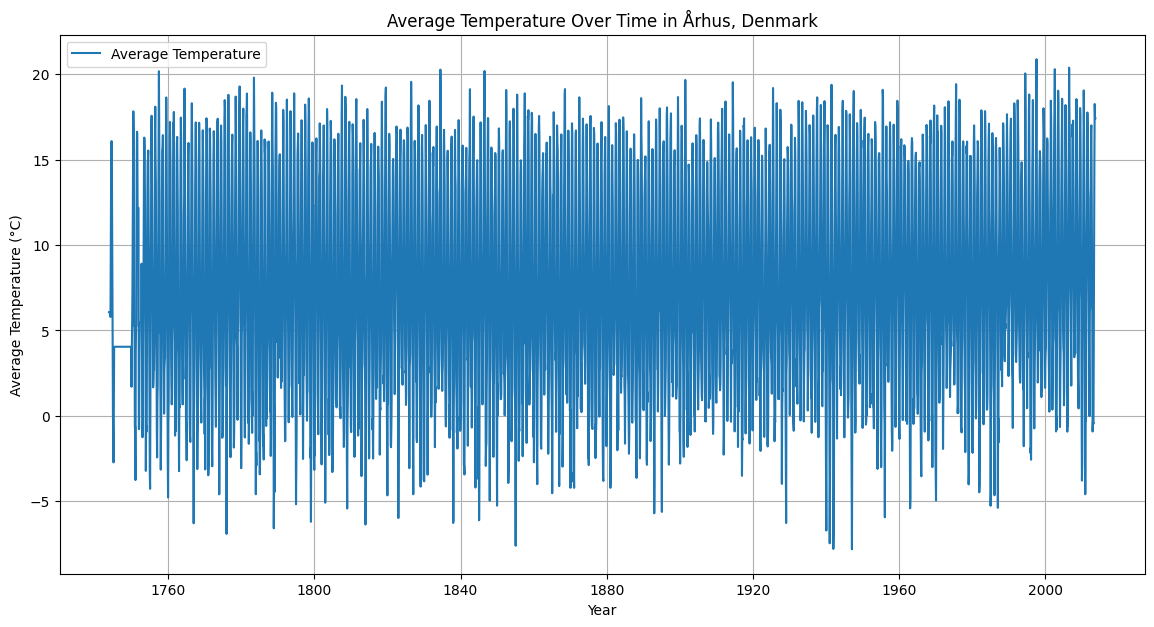

In [15]:
import matplotlib.pyplot as plt

# Filter data for Århus
aarhus_df = df[df['City'] == 'Århus']

# Plot average temperature over time
plt.figure(figsize=(14, 7))
plt.plot(aarhus_df['dt'], aarhus_df['AverageTemperature'], label='Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Over Time in Århus, Denmark')
plt.legend()
plt.grid(True)
plt.show()


# Seasonal Analysis

<ipython-input-16-8ebcb43c0fcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aarhus_df['Year'] = aarhus_df['dt'].dt.year
<ipython-input-16-8ebcb43c0fcf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aarhus_df['Month'] = aarhus_df['dt'].dt.month


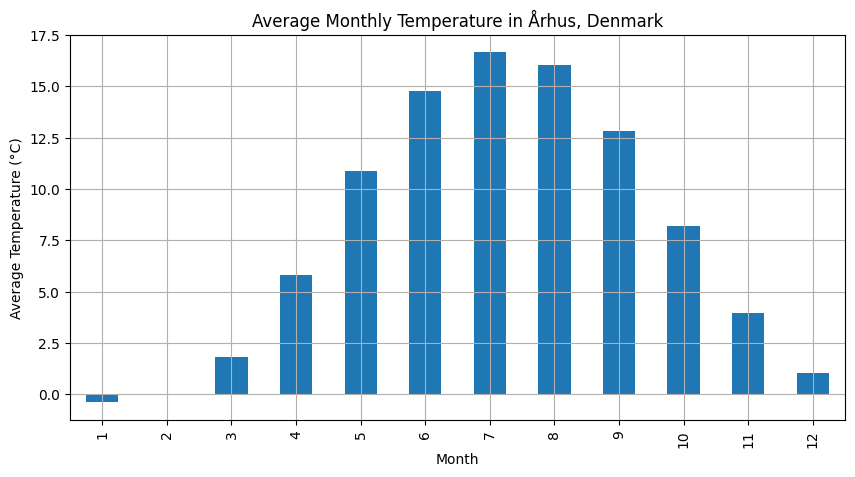

In [16]:
# Extract month and year from the date
aarhus_df['Year'] = aarhus_df['dt'].dt.year
aarhus_df['Month'] = aarhus_df['dt'].dt.month

# Group by month and calculate the mean temperature for each month
monthly_avg_temp = aarhus_df.groupby('Month')['AverageTemperature'].mean()

# Plot the seasonal pattern
plt.figure(figsize=(10, 5))
monthly_avg_temp.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Monthly Temperature in Århus, Denmark')
plt.grid(True)
plt.show()


# Temperature vs. Latitude

float64


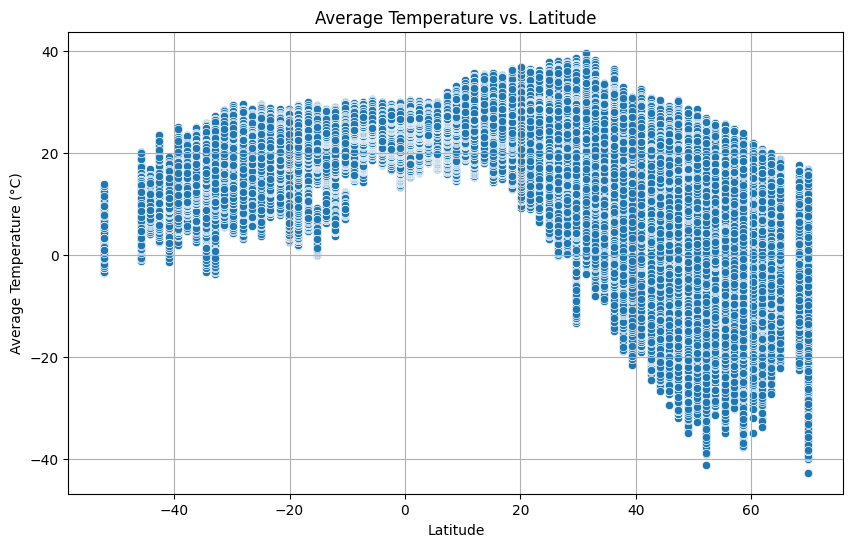

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the data type of the 'Latitude' column
print(df['Latitude'].dtype)

# Convert Latitude to string type if it's not already
if not pd.api.types.is_string_dtype(df['Latitude']):
    df['Latitude'] = df['Latitude'].astype(str)

# Convert Latitude to numeric (removing N/S)
df['Latitude'] = df['Latitude'].str.rstrip('NS').astype(float)

# Plot temperature vs. latitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitude', y='AverageTemperature', data=df)
plt.xlabel('Latitude')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature vs. Latitude')
plt.grid(True)
plt.show()


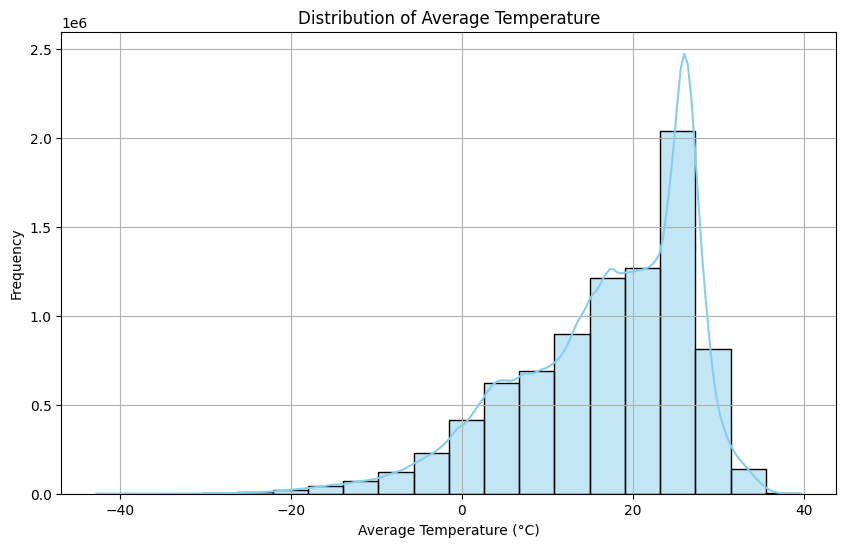

In [25]:
# Plot temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['AverageTemperature'], bins=20, kde=True, color='skyblue')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Temperature')
plt.grid(True)
plt.show()

In [26]:
df.Country.unique()

array(['Denmark', 'Turkey', 'Kazakhstan', 'China', 'Spain', 'Germany',
       'Nigeria', 'Iran', 'Russia', 'Canada', "Côte D'Ivoire",
       'United Kingdom', 'Saudi Arabia', 'Japan', 'United States',
       'India', 'Benin', 'United Arab Emirates', 'Mexico', 'Venezuela',
       'Ghana', 'Ethiopia', 'Australia', 'Yemen', 'Indonesia', 'Morocco',
       'Pakistan', 'France', 'Libya', 'Burma', 'Brazil', 'South Africa',
       'Syria', 'Egypt', 'Algeria', 'Netherlands', 'Malaysia', 'Portugal',
       'Ecuador', 'Italy', 'Uzbekistan', 'Philippines', 'Madagascar',
       'Chile', 'Belgium', 'El Salvador', 'Romania', 'Peru', 'Colombia',
       'Tanzania', 'Tunisia', 'Turkmenistan', 'Israel', 'Eritrea',
       'Paraguay', 'Greece', 'New Zealand', 'Vietnam', 'Cameroon', 'Iraq',
       'Afghanistan', 'Argentina', 'Azerbaijan', 'Moldova', 'Mali',
       'Congo (Democratic Republic Of The)', 'Thailand',
       'Central African Republic', 'Bosnia And Herzegovina', 'Bangladesh',
       'Switzerland'

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       float64       
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 459.2+ MB


<ipython-input-28-7979079238c2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data.dropna(subset=['AverageTemperature'], inplace=True)
<ipython-input-28-7979079238c2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pakistan_data.dropna(subset=['AverageTemperature'], inplace=True)


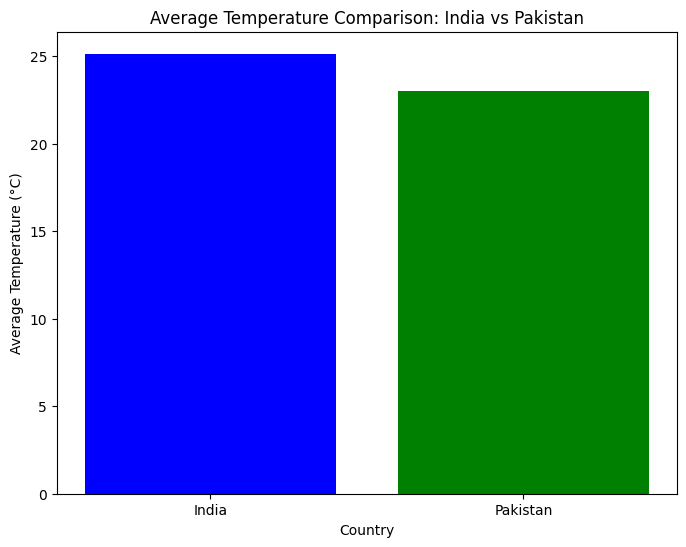

In [28]:
# Filter data for India and Pakistan
india_data = df[df['Country'] == 'India']
pakistan_data = df[df['Country'] == 'Pakistan']

# Drop rows with missing temperature values
india_data.dropna(subset=['AverageTemperature'], inplace=True)
pakistan_data.dropna(subset=['AverageTemperature'], inplace=True)

# Calculate average temperature for India and Pakistan
india_avg_temp = india_data['AverageTemperature'].mean()
pakistan_avg_temp = pakistan_data['AverageTemperature'].mean()

# Plotting
plt.figure(figsize=(8, 6))
countries = ['India', 'Pakistan']
avg_temps = [india_avg_temp, pakistan_avg_temp]
plt.bar(countries, avg_temps, color=['blue', 'green'])
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature Comparison: India vs Pakistan')
plt.show()

# Statistical Analysis

# train test split


In [30]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05,10.33E
1,1743-12-01,6.068,1.737,Århus,Denmark,57.05,10.33E
2,1744-01-01,6.068,1.737,Århus,Denmark,57.05,10.33E
3,1744-02-01,6.068,1.737,Århus,Denmark,57.05,10.33E
4,1744-03-01,6.068,1.737,Århus,Denmark,57.05,10.33E


# Encoding

In [31]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df['Country_encoded'] = label_encoder.fit_transform(df['Country'])

print(df['Country_encoded'])

0           39
1           39
2           39
3           39
4           39
          ... 
8599207    100
8599208    100
8599209    100
8599210    100
8599211    100
Name: Country_encoded, Length: 8599212, dtype: int64


In [32]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df['Longitude_encoded'] = label_encoder.fit_transform(df['Longitude'])

print(df['Longitude_encoded'])

0           14
1           14
2           14
3           14
4           14
          ... 
8599207    715
8599208    715
8599209    715
8599210    715
8599211    715
Name: Longitude_encoded, Length: 8599212, dtype: int64


In [33]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df['City_encoded'] = label_encoder.fit_transform(df['City'])

print(df['City_encoded'])

0          3443
1          3443
2          3443
3          3443
4          3443
           ... 
8599207    3442
8599208    3442
8599209    3442
8599210    3442
8599211    3442
Name: City_encoded, Length: 8599212, dtype: int64


In [34]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
label_encoder = LabelEncoder()
df['dt_encoded'] = label_encoder.fit_transform(df['dt'])

print(df['dt_encoded'])

0             0
1             1
2             2
3             3
4             4
           ... 
8599207    3234
8599208    3235
8599209    3236
8599210    3237
8599211    3238
Name: dt_encoded, Length: 8599212, dtype: int64


In [35]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Country_encoded,Longitude_encoded,City_encoded,dt_encoded
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05,10.33E,39,14,3443,0
1,1743-12-01,6.068,1.737,Århus,Denmark,57.05,10.33E,39,14,3443,1
2,1744-01-01,6.068,1.737,Århus,Denmark,57.05,10.33E,39,14,3443,2
3,1744-02-01,6.068,1.737,Århus,Denmark,57.05,10.33E,39,14,3443,3
4,1744-03-01,6.068,1.737,Århus,Denmark,57.05,10.33E,39,14,3443,4


In [50]:
df_select=df.loc[:,['dt_encoded','Latitude','City_encoded','Country_encoded','Longitude_encoded','AverageTemperature']]
Y = df_select['AverageTemperature']
X = df_select.drop(columns=['AverageTemperature'])

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=50)

## train model

# Naive Bayes

In [64]:
from sklearn.neighbors import KNeighborsRegressor
# Create the regressor model
regressor = KNeighborsRegressor(n_neighbors=3)
# Fit the model to your training data
regressor.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

# Evaluating model

In [65]:
from sklearn.metrics import r2_score#r2_score tells us how good the model is doing

In [66]:
predictions = regressor.predict(X_test)

In [67]:
r2_score(Y_test,predictions)# if it give 1 it means model is 100 % correct and if we run again from test split heading result will be different

0.890976196591474